In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

import scipy.stats as stats
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re

In [3]:
df = pd.read_csv('E:/USvideos.csv')

In [4]:
df.shape

(40949, 16)

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Loading the JSON file containing category details

In [6]:
category_json_path = 'E:/US_category_id.json'
with open (category_json_path) as file:
    category_data = json.load(file)
    

category_dict={int(category['id']):category['snippet']['title'] for category in category_data['items']}

df['category_name']=df['category_id'].map(category_dict)
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,Gaming


# Days for each video has been trending

In [8]:
trending_days_count = df.groupby('video_id')['trending_date'].nunique().reset_index().set_index('video_id')
trending_days_count.rename(columns={'trending_date':'trending_days'},inplace=True)
trending_days_count.head()

,trending_days
video_id,
-0CMnp02rNY,6
-0NYY8cqdiQ,1
-1Hm41N0dUs,3
-1yT-K3c6YI,4
-2RVw2_QyxQ,3


# Relationship between Views and Days for the videos have been trending

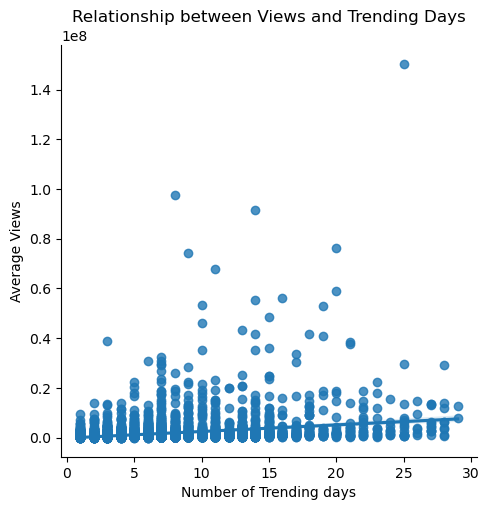

In [10]:
mean_views_per_video = df.groupby('video_id')['views'].mean()
trending_views_df = pd.DataFrame(mean_views_per_video).merge(pd.DataFrame(trending_days_count), left_index=True, right_index=True)
trending_views_df

sns.lmplot(x='trending_days',y='views',data=trending_views_df)

plt.xlabel('Number of Trending days')
plt.ylabel('Average Views')
plt.title('Relationship between Views and Trending Days')
plt.show()

# Plotting factors: Views, Likes, Comments, Trending Days

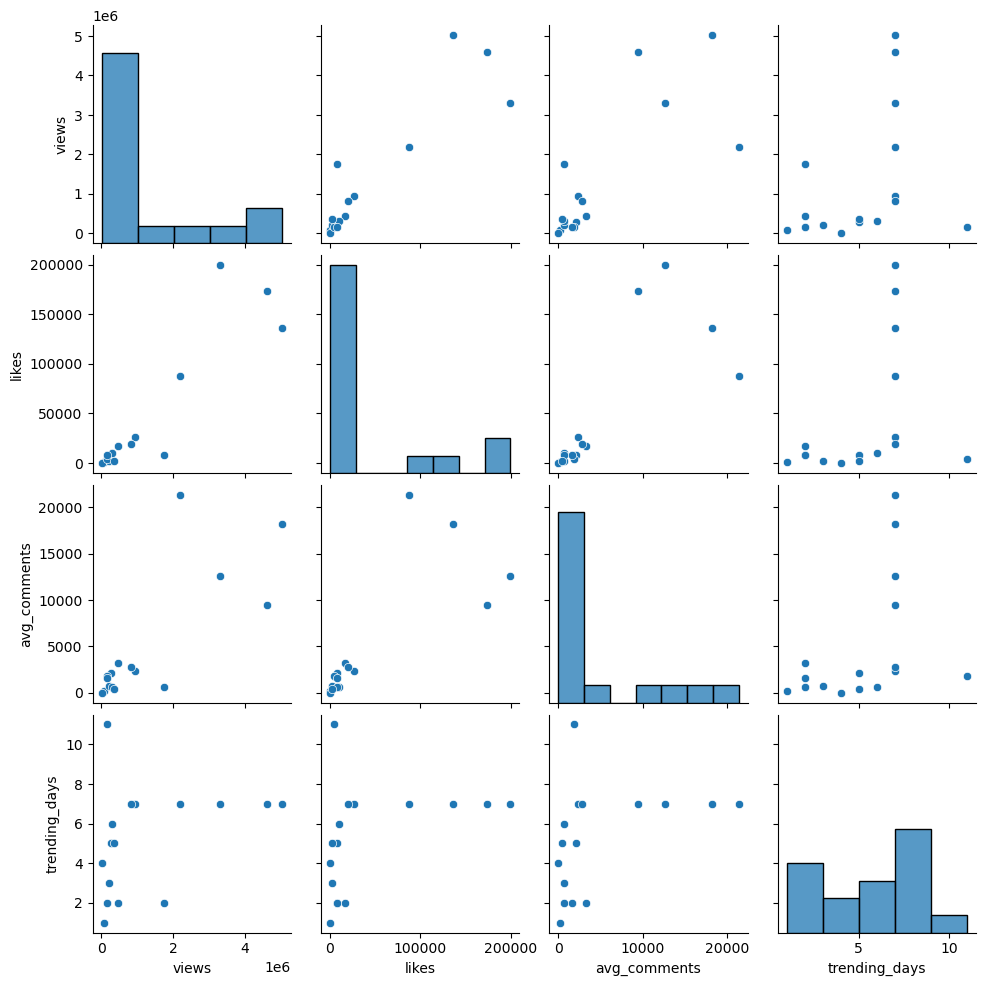

,views,likes,avg_comments,trending_days
views,1.000000,0.907257,0.781595,0.350687
likes,0.907257,1.000000,0.779217,0.403666
avg_comments,0.781595,0.779217,1.000000,0.408582
trending_days,0.350687,0.403666,0.408582,1.000000


In [12]:
trending_days = df.groupby('video_id')['trending_date'].nunique()
average_metrics = df.groupby('video_id')[['views','likes','comment_count']].mean()
merged_data = average_metrics.merge(trending_days,left_index=True,right_index=True).merge(
               df[['video_id','category_name']].set_index('video_id').drop_duplicates()
                ,left_index=True,right_index=True)
merged_data.rename(columns={'trending_date':'trending_days','comment_count':'avg_comments'},inplace=True)
sns.pairplot(merged_data, vars=['views','likes','avg_comments','trending_days'])
plt.show()

correlation_matrix = merged_data[['views','likes','avg_comments','trending_days']].corr()
correlation_matrix

# Most occuring Tags in Top 10% of the Trending Videos

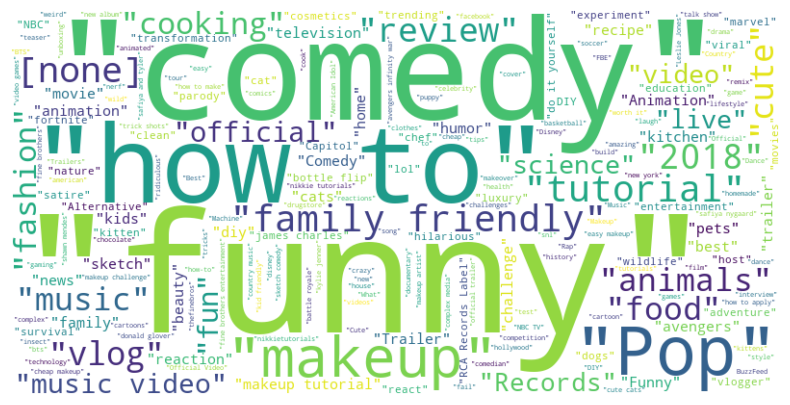

In [13]:
top_trending_videos = trending_days.sort_values(ascending=False).head(int(len(trending_days)*0.1))
top_videos = df[df['video_id'].isin(top_trending_videos.index)]
tags = '|'.join(top_videos['tags']).split('|')
tag_counts = Counter(tags)
wordcloud = WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(tag_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Day and Hour having the highest number of views

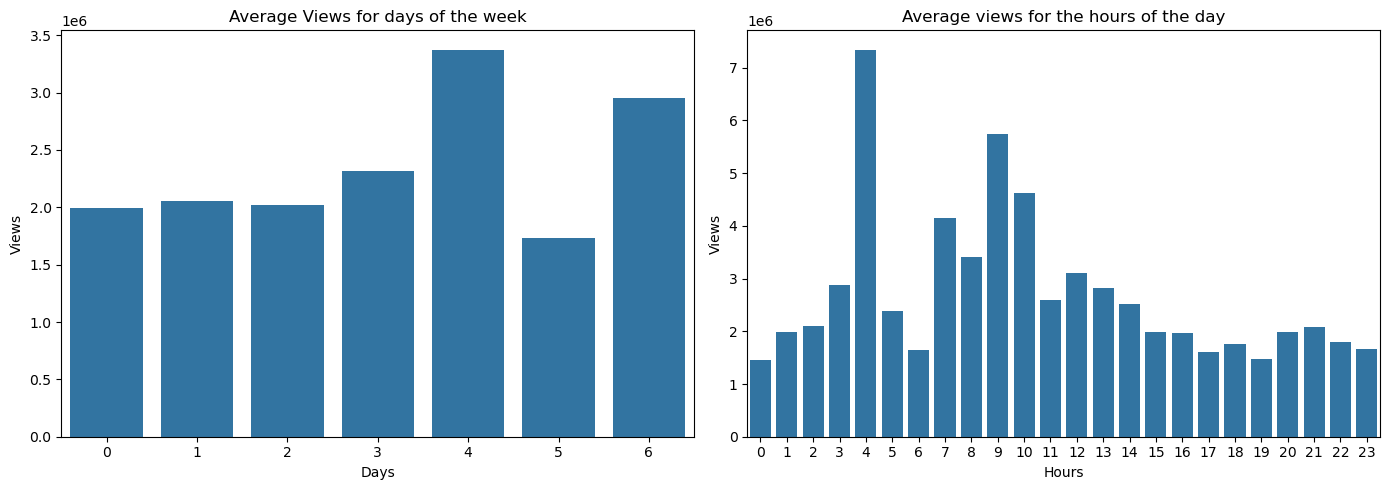

In [57]:
df['publish_time']=pd.to_datetime(df['publish_time'])
df['publish_day']=df['publish_time'].dt.dayofweek
df['publish_hour']=df['publish_time'].dt.hour

days_views=df.groupby('publish_day')['views'].mean()
hours_views=df.groupby('publish_hour')['views'].mean()

fig, axes = plt.subplots(1,2,figsize=(14,5))

sns.barplot(x=days_views.index,y=days_views.values,ax = axes[0])
axes[0].set_title('Average Views for days of the week')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Views')

sns.barplot(x=hours_views.index,y=hours_views.values,ax=axes[1])
axes[1].set_title('Average views for the hours of the day')
axes[1].set_xlabel('Hours')
axes[1].set_ylabel('Views')

plt.tight_layout()
plt.show()

# Words occuring the most in the title and description of the trending videos

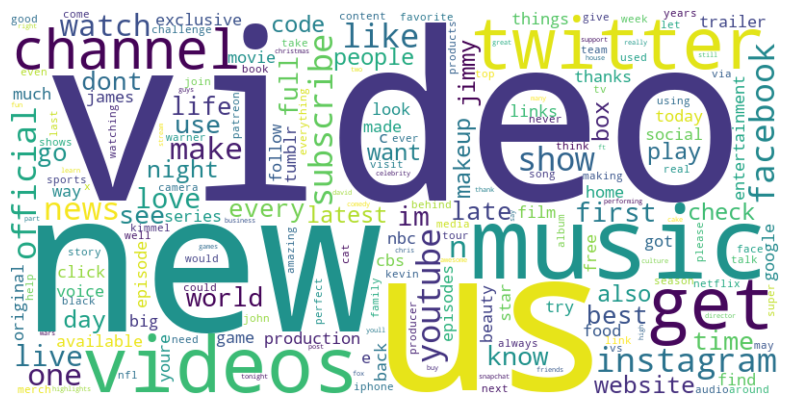

In [14]:
df['text'] = df['title']+ ' ' +df['description']

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '',text)
    tokens=text.split()
    tokens= [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

df['tokens'] = df['text'].apply(preprocess)

word_freq = Counter()
for tokens in df['tokens']:
    word_freq.update(tokens)

wordcloud = WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Donut Chart for the Trending Categories

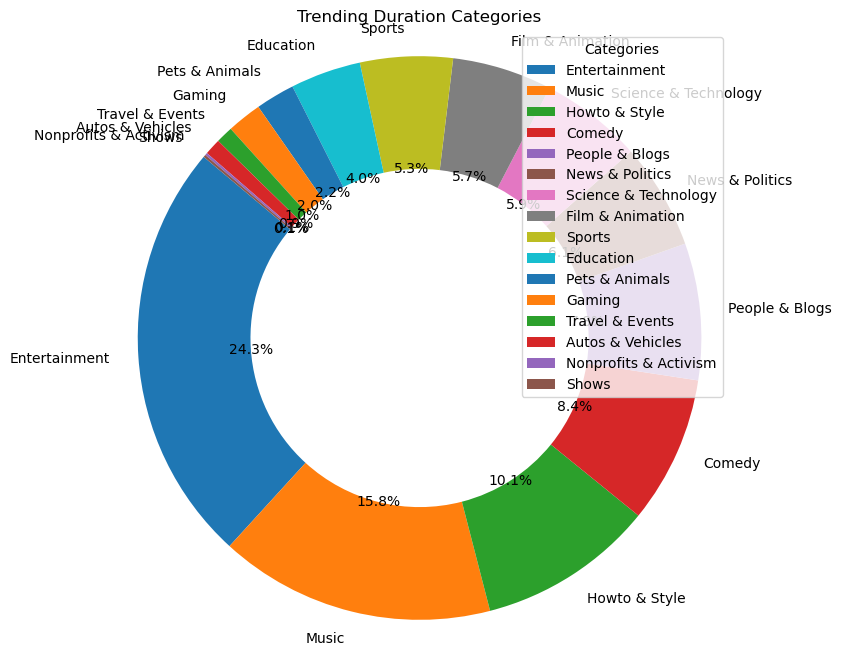

In [78]:
trending_duration_counts = df['category_name'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(trending_duration_counts, labels=trending_duration_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.axis('equal')
plt.title('Trending Duration Categories')
plt.legend(title='Categories', loc='upper right')
plt.show()